In [4]:
import os
from pathlib import Path
from PIL import Image
# import geopandas as gpd
import itertools
import numpy as np
import matplotlib.pyplot as plt

from my_functions_new import *
from my_plotting_functions import *

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define whether to filter out values <0.1
remove_little_values = True

model_directory = '../../../../FloodModelling/MeganModel_New/'

### Plot the clusters

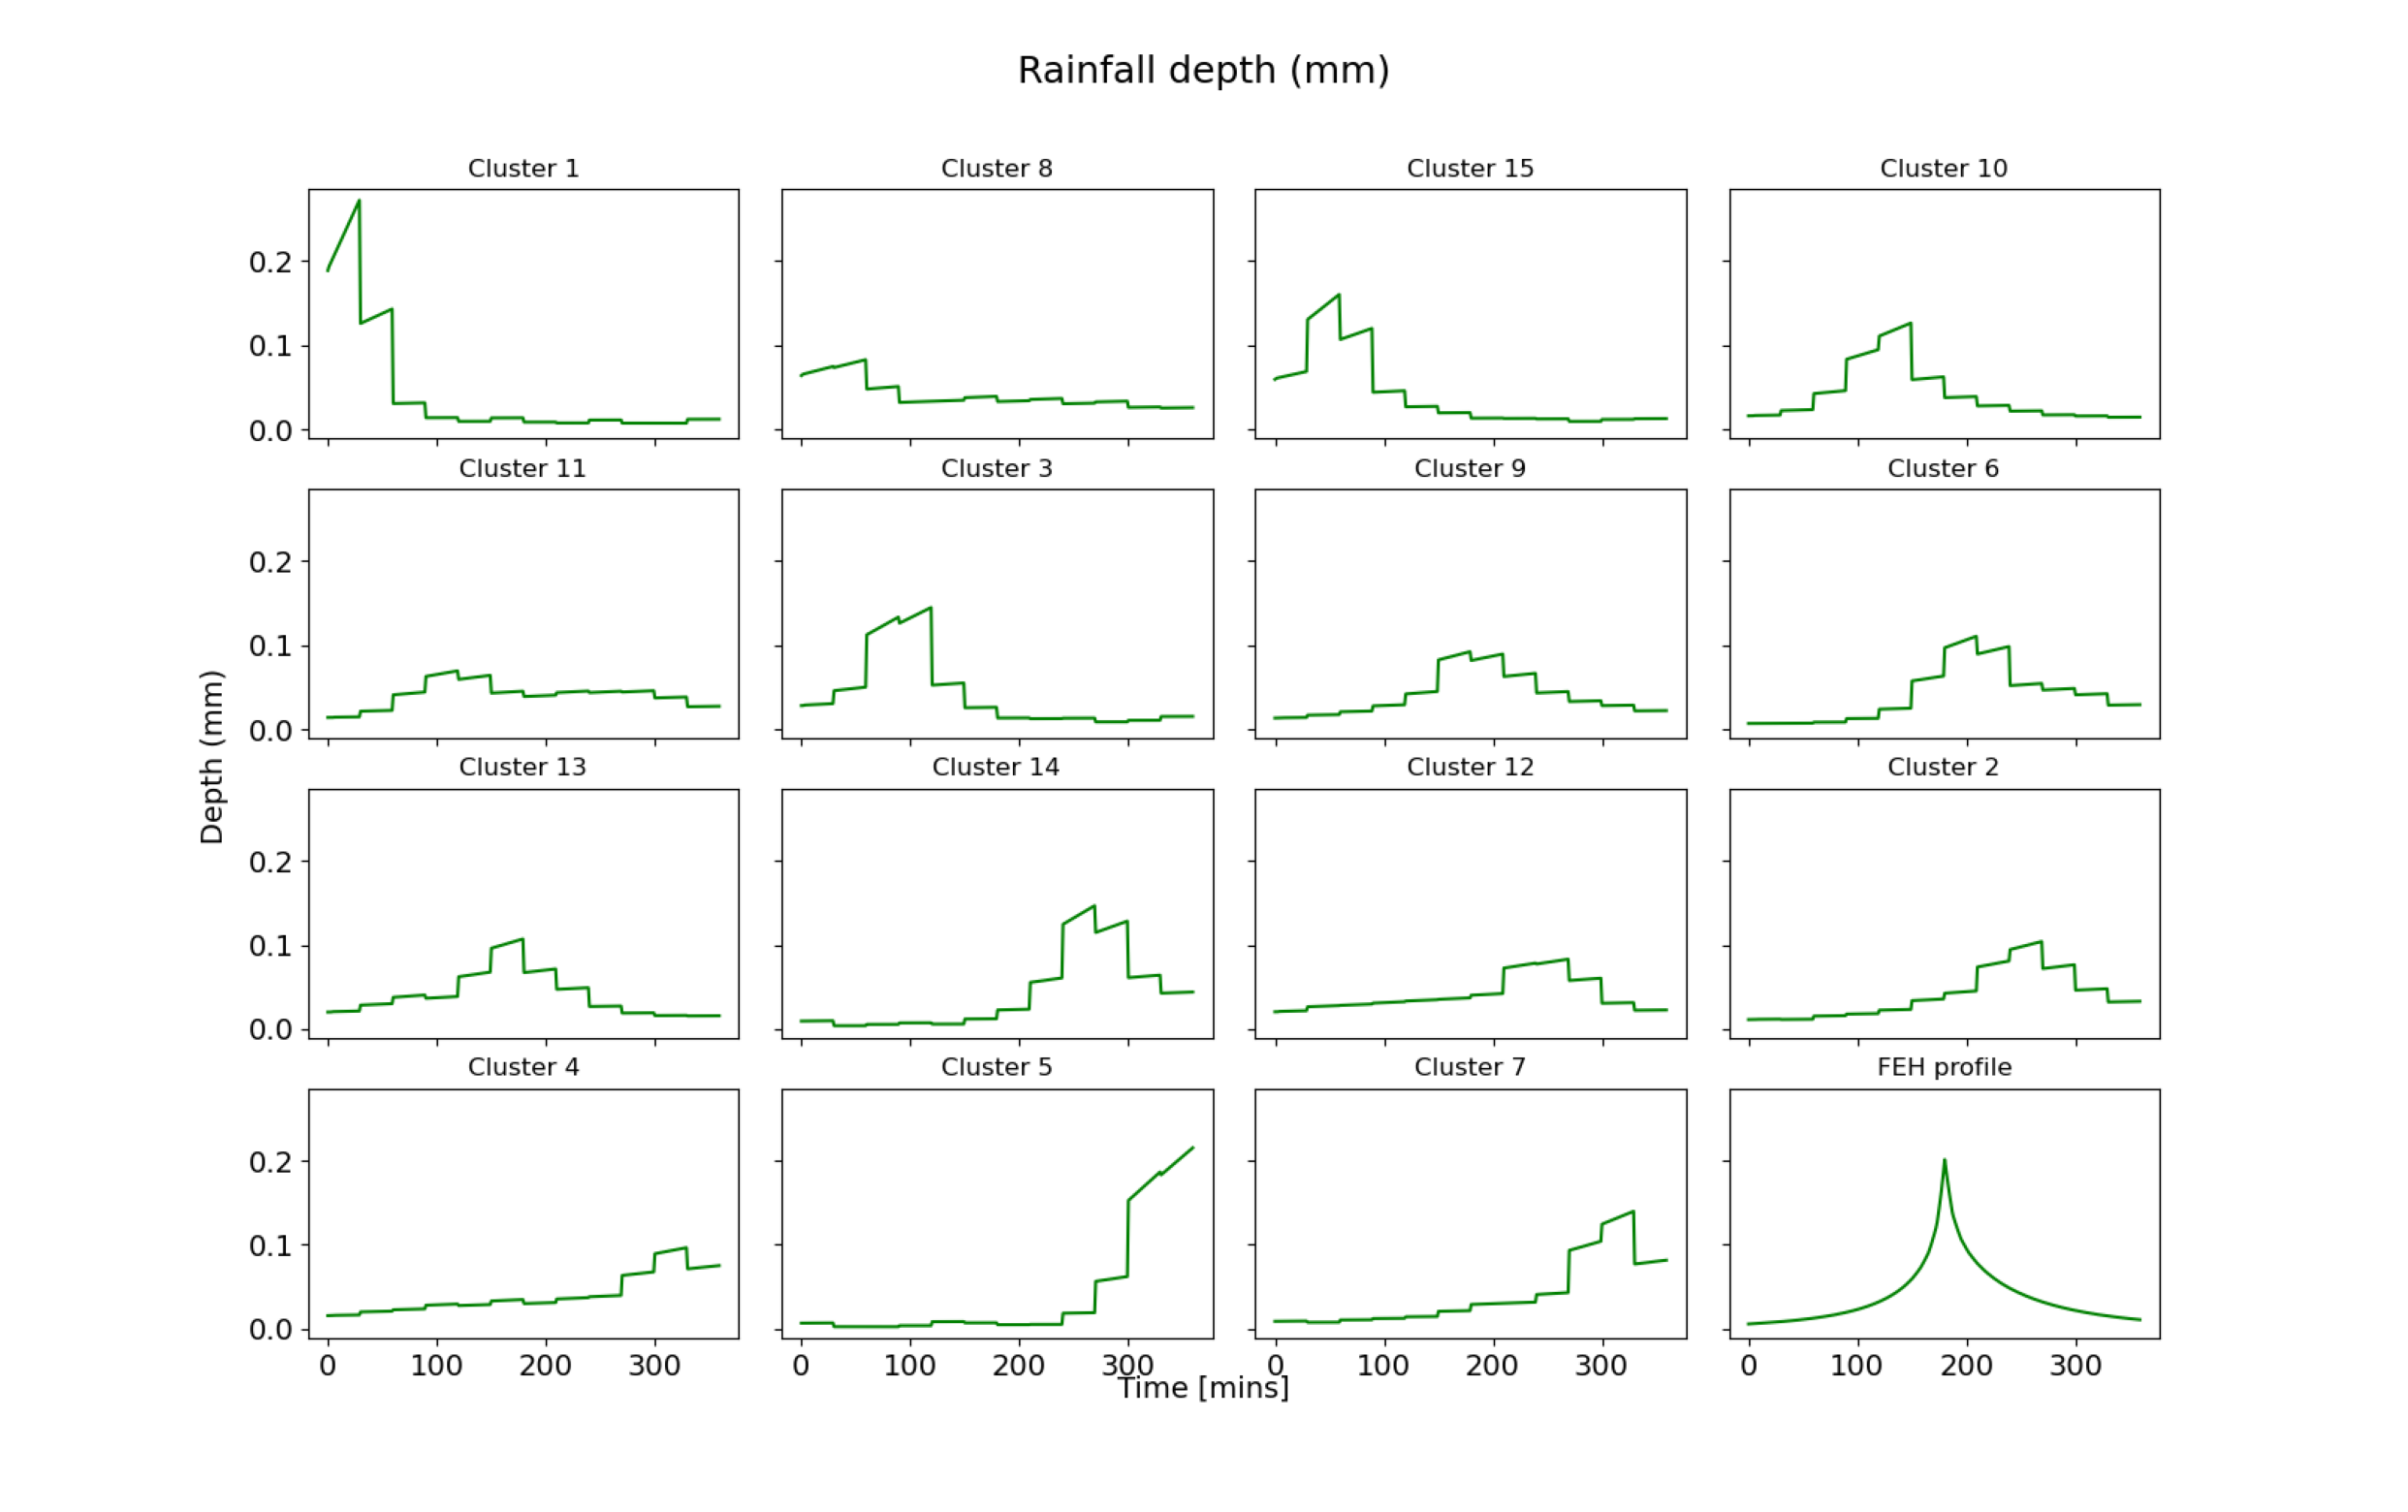

In [5]:
fig,ax =plt.subplots(figsize=(40,20))
img = Image.open("../../CreateSyntheticRainfallEvents/ObservedProfiles/6hr_100yrRP/PostLossRemoval/clusters_ordered_by_loadingstyle.png")
plt.axis('off')
plt.imshow(img);

### Define the names of the method (shorter and longer versions)

In [6]:
short_ids = ['6h_sp','6h_c1','6h_c2','6h_c3','6h_c4', '6h_c5', '6h_c6','6h_c7',
            '6h_c8','6h_c9', '6h_c10', '6h_c11','6h_c12','6h_c13','6h_c14', '6h_c15']   
methods = ['6h_single-peak', 'Cluster1', 'Cluster2', 'Cluster3', 'Cluster4', 'Cluster5', 'Cluster6', 'Cluster7', 'Cluster8',
           'Cluster9','Cluster10', 'Cluster11',  'Cluster12','Cluster13', 'Cluster14', 'Cluster15']  
# 
short_ids_by_loading = ['6h_sp','6h_c1','6h_c8','6h_c15','6h_c3','6h_c11','6h_c10','6h_c9','6h_c13','6h_c6',
 '6h_c2','6h_c12','6h_c14','6h_c4','6h_c7','6h_c5']
short_ids_by_intensity = ['6h_sp','6h_c1','6h_c5','6h_c15','6h_c14','6h_c3','6h_c7','6h_c10','6h_c6','6h_c13',
 '6h_c2','6h_c4','6h_c9','6h_c12','6h_c8','6h_c11']

In [7]:
cluster_results= pd.read_csv("allclusters_summary.csv")

# Relationship between the number of flooded cells in urban and non-urban areas

27% of the catchment is classified as either urban or semi-urban.     
Changes to the extent, depth and velocity of flooding in these areas are the most important.  
Therefore, it is important to determine whether any of the rainfall scenarios result in a greater proportion of the flooding taking part in these urban areas.  

The plots below show the relationship between the flooded area and the urban flooded area. There is a fairly consistent relationship across all the scenarios, with between 33 and 35% of the flooding being in urban areas. 

In [331]:
# cluster_results['UrbanFloodedArea'] /cluster_results['TotalFloodedArea'] 

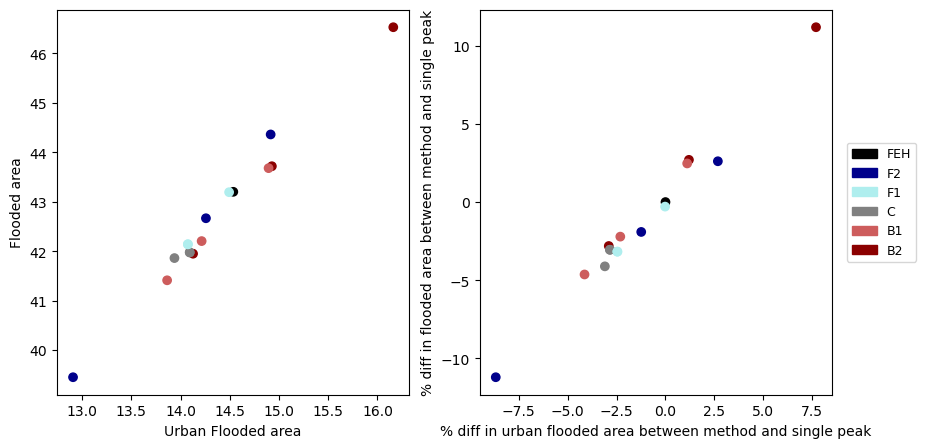

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (10,5))
# The urban flooded area as a percentage of the total area 
axs[0].scatter(cluster_results['UrbanFloodedArea'], cluster_results['TotalFloodedArea'], color = cluster_results['colour'])
axs[0].set_xlabel('Urban Flooded area')
axs[0].set_ylabel('Flooded area')
# (cluster_results['UrbanFloodedArea']/cluster_results['TotalFloodedArea'])*100
# The difference between the flooded area from a method and single peak 
axs[1].scatter(cluster_results['%Diff_FloodedArea_fromSP'], cluster_results['%Diff_UrbanFloodedArea_fromSP'],
              color = cluster_results['colour'])
axs[1].set_xlabel('% diff in urban flooded area between method and single peak')
axs[1].set_ylabel('% diff in flooded area between method and single peak');

colors = ['black','darkblue', 'paleturquoise', 'grey', 'indianred', 'darkred']
texts = ['FEH','F2','F1','C', 'B1', 'B2'] 
patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
plt.legend(handles=patches, bbox_to_anchor=(1.14, 0.5), loc='center', ncol=1, prop={'size': 9} );

In [343]:
# import seaborn as sns
# sns.lmplot(x='UrbanFloodedArea', y='TotalFloodedArea',data=cluster_results)
# # sns.lmplot(x='UrbanFloodedArea', y='TotalFloodedArea',hue = 'colour', data=cluster_results)
# plt.title("Scatter Plot with Linear fit");

# Relationship between the total flooded area and the rainfall scenario used
One difference that might be expected to arise from the use of different rainfall scenarios is a difference in the total area which is flooded.

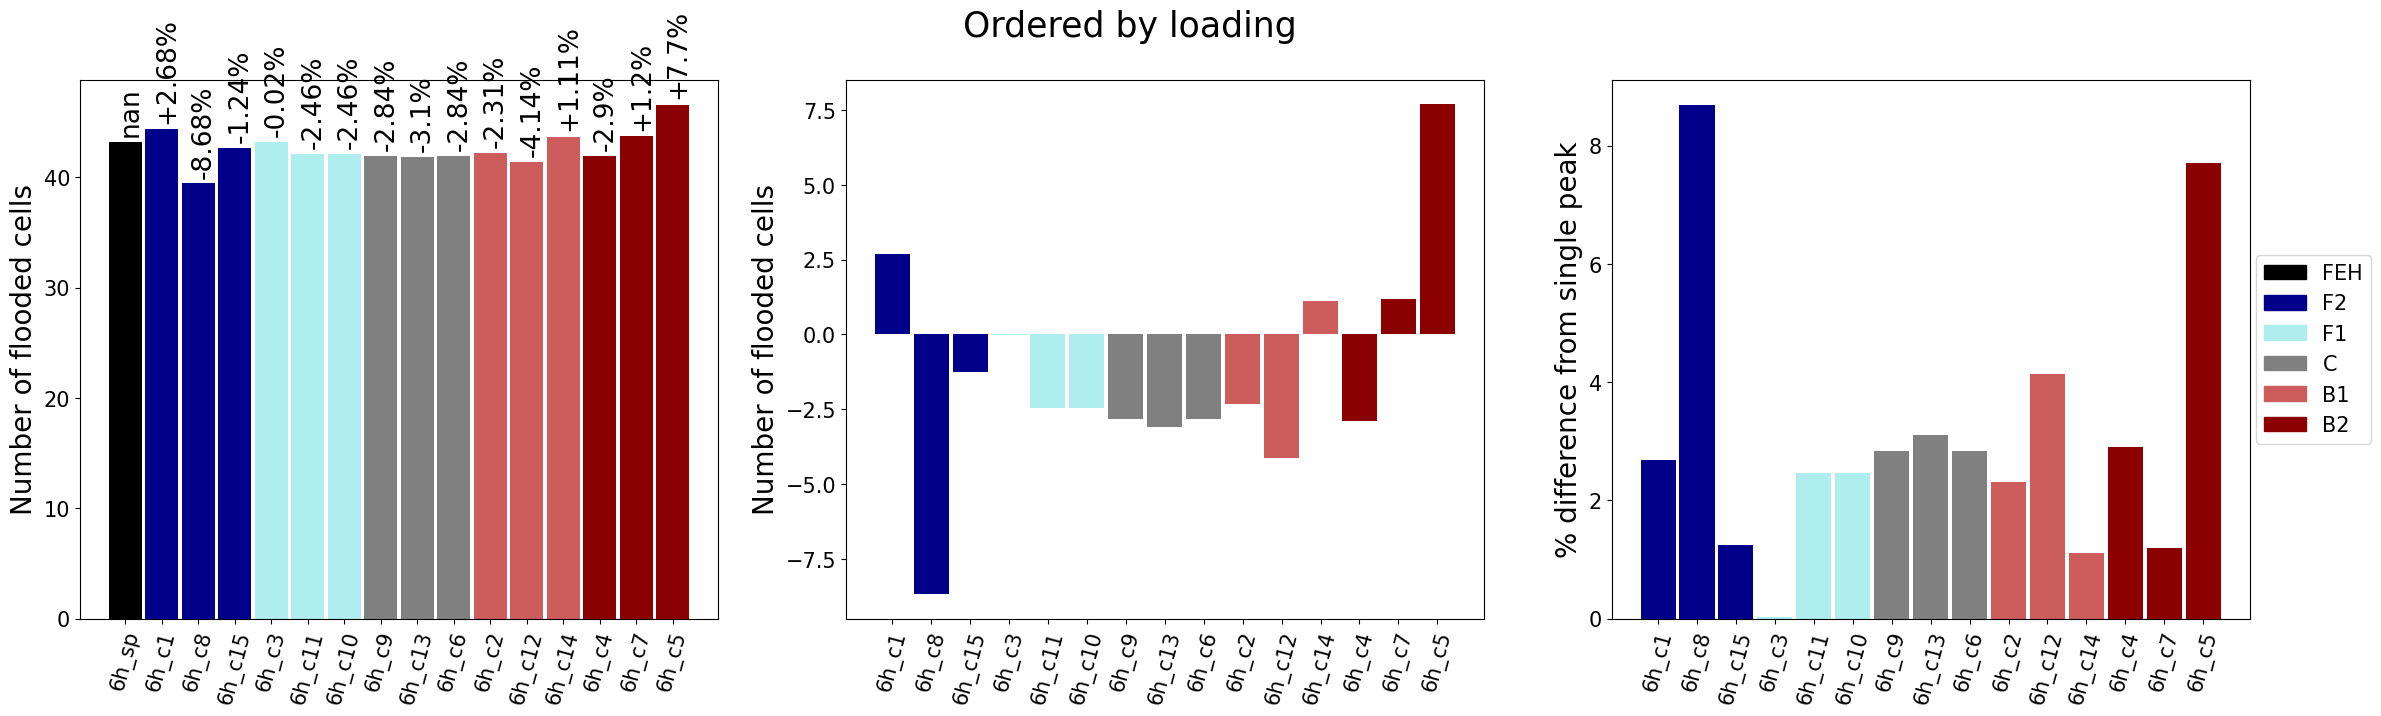

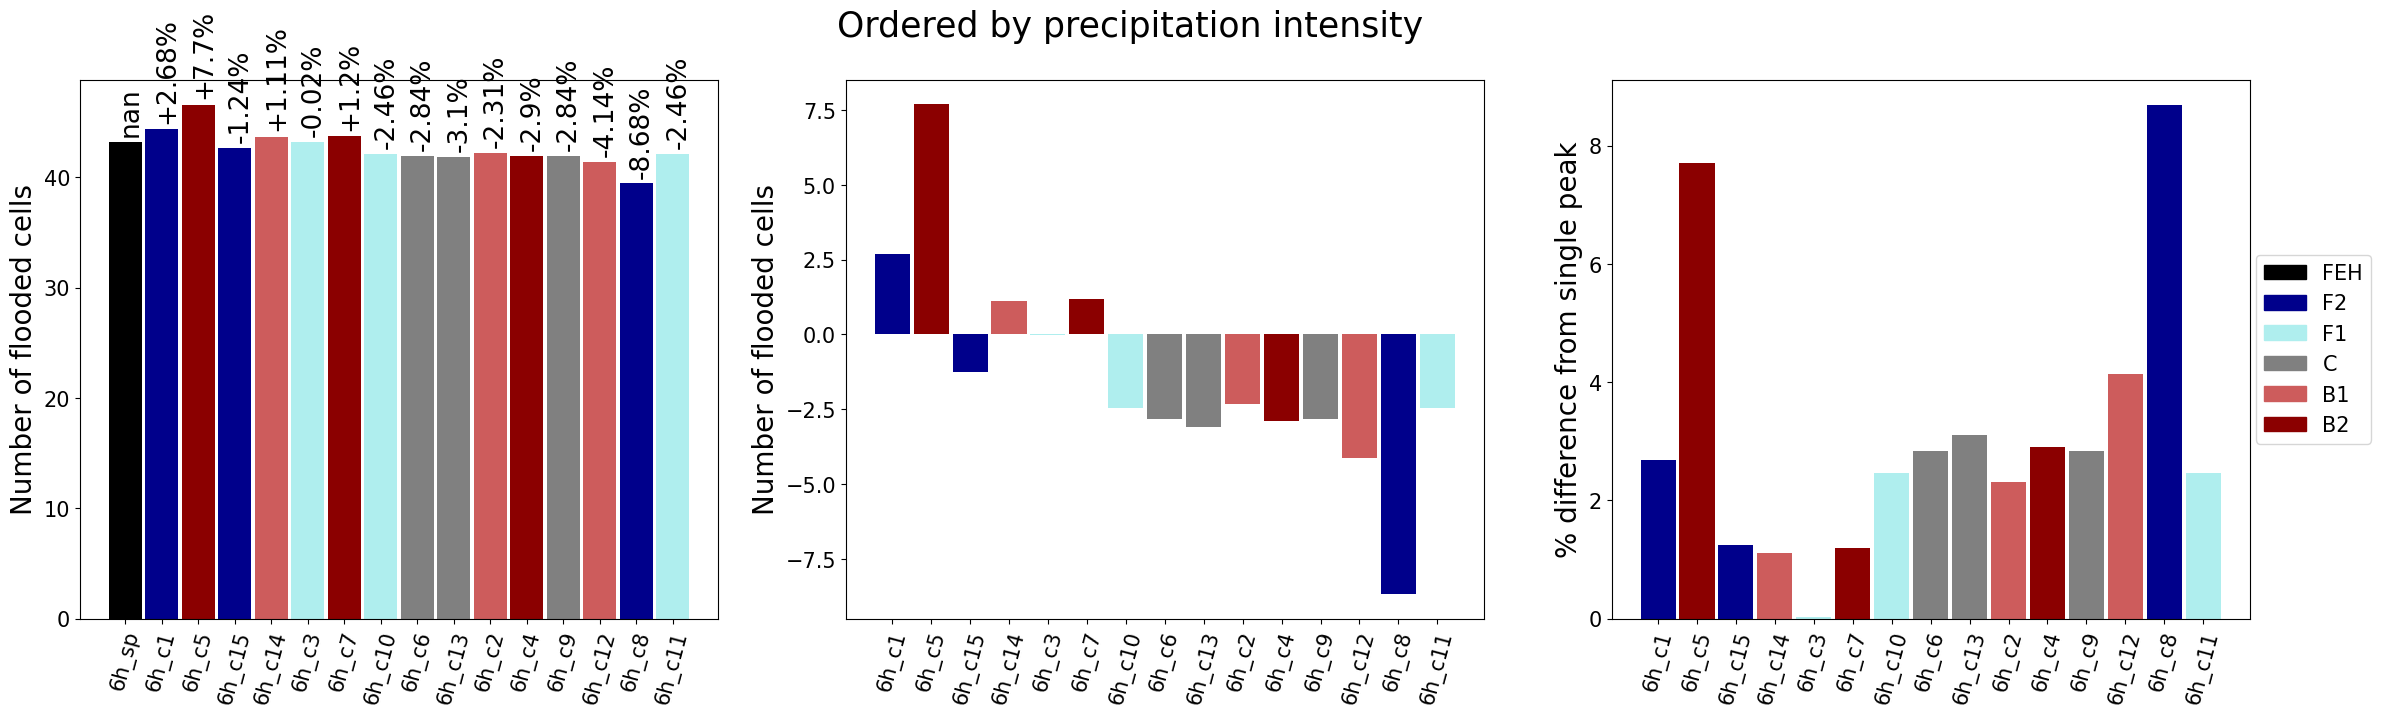

In [16]:
plot_totals(cluster_results, short_ids_by_loading, 'Ordered by loading')
plot_totals(cluster_results, short_ids_by_intensity, 'Ordered by precipitation intensity')

### Plot the maximum peak intensity value against the flooded area

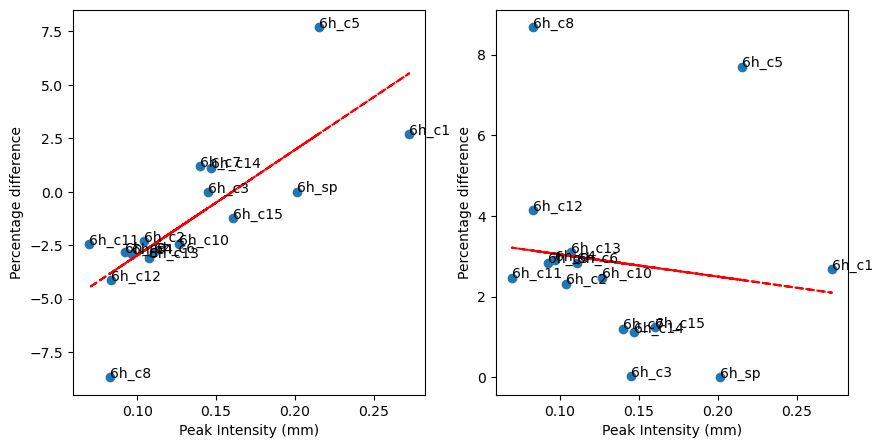

In [18]:
peak_intensities = cluster_results['MaxRainfallIntensity'].tolist()
perc_diffs = cluster_results['%Diff_FloodedArea_fromSP'].tolist()
abs_perc_diffs = cluster_results['Abs%Diff_FloodedArea_fromSP'].tolist()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (10,5))
scatter_plot_with_trend_line(axs[0], short_ids, peak_intensities, perc_diffs, 'Peak Intensity (mm)' , 'Percentage difference')
scatter_plot_with_trend_line(axs[1], short_ids, peak_intensities, abs_perc_diffs, 'Peak Intensity (mm)' , 'Percentage difference')

### Plot the minute of the maximum peak intensity value against the flooded area

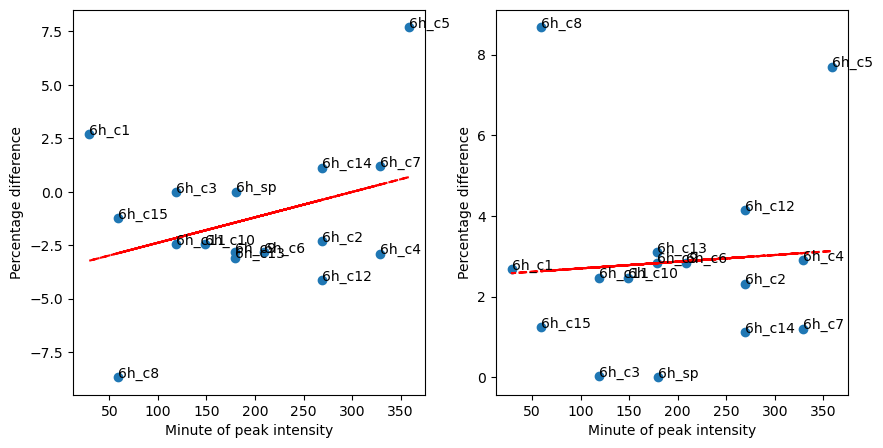

In [19]:
peak_intensities = cluster_results['MaxRainfallIntensityMinute'].tolist()
perc_diffs = cluster_results['%Diff_FloodedArea_fromSP'].tolist()
abs_perc_diffs = cluster_results['Abs%Diff_FloodedArea_fromSP'].tolist()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (10,5))
   
scatter_plot_with_trend_line(axs[0], short_ids, peak_intensities, perc_diffs, 'Minute of peak intensity' , 'Percentage difference')
scatter_plot_with_trend_line(axs[1], short_ids, peak_intensities, abs_perc_diffs, 'Minute of peak intensity' , 'Percentage difference')

### Plot the proportion of the total flooded cells in various depth/velocity categories
To test whether any of the scenarios lead to more severe flooding outcomes (within the same flooded extent)

In [48]:
def bar_plot_props (ax, props_df, variable_name, short_ids_order, colours_df):
    
    labels = props_df.index
    x = np.arange(len(props_df.index))
    width = 0.3
        
    props_df = props_df[short_ids_order].copy()
    
    colours_df =colours_df.reindex(colours_df['short_id'].map(dict(zip(short_ids_order, range(len(short_ids_order))))).sort_values().index)
    colours_df.reset_index(inplace=True, drop=True)
    
    # counts_df plotting
    width, DistBetweenBars, Num = 0.05, 0.01, 16 # width of each bar, distance between bars, number of bars in a group
    # calculate the width of the grouped bars (including the distance between the individual bars)
    WithGroupedBars = Num*width + (Num-1)*DistBetweenBars        
        
    # Proportions_df plotting
    for i in range(Num):
        ax.bar(np.arange(len(props_df))-WithGroupedBars/2 + (width+DistBetweenBars)*i, props_df.iloc[:,i], width, 
                color = colours_df['colour'][i])
    ax.set_xticks(np.arange(len(labels)))
    ax.set_xticklabels(labels, rotation=30, fontsize = 12)
    ax.set_xlabel('Flood {}'.format(variable_name), fontsize = 15)
    ax.set_ylabel('Proportion of cells', fontsize = 15)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())


In [95]:
velocity_counts  = cluster_results[['<=0.3m_countcells_urban','0.3-0.6m_countcells_urban', '0.6-1.2m_countcells_urban', '>1.2m_countcells_urban']]
velocity_counts.columns = [col.replace('_{}'.format(column_names[0].split('_')[1]), '') for col in velocity_counts.columns]
if 'urban' in velocity_counts.columns[1]:
    print(True)
    velocity_counts.columns = [col.replace('_urban', '') for col in velocity_counts.columns]

    
    # column_names[0].split('_')[1]
# if velocity_counts.columns[1].strcontains('urban'):
#     print(True)
if 'urban' in velocity_counts.columns[1]:
     print(True)

IndentationError: expected an indented block (2538328826.py, line 7)

In [96]:
def reformat_counts_and_props(column_names):
    
    velocity_counts  = cluster_results[column_names]
    velocity_counts.columns = [col.replace('_{}'.format(column_names[0].split('_')[1]), '') for col in velocity_counts.columns]
    if 'urban' in velocity_counts.columns[1]:
        velocity_counts.columns = [col.replace('_urban', '') for col in velocity_counts.columns]
    velocity = velocity_counts.T
    velocity.columns = short_ids

    return velocity
    
velocity_props  =  reformat_counts_and_props(['<=0.25m/s_propcells','0.25-0.5m/s_propcells', '0.5-2m/s_propcells', '>2m/s_propcells'])        
velocity_props_urban  =  reformat_counts_and_props(['<=0.25m/s_propcells_urban','0.25-0.5m/s_propcells_urban', '0.5-2m/s_propcells_urban', '>2m/s_propcells_urban'])
velocity_counts  =  reformat_counts_and_props(['<=0.25m/s_countcells','0.25-0.5m/s_countcells', '0.5-2m/s_countcells', '>2m/s_countcells'])        
velocity_counts_urban  =  reformat_counts_and_props(['<=0.25m/s_countcells_urban','0.25-0.5m/s_countcells_urban', '0.5-2m/s_countcells_urban', '>2m/s_countcells_urban'])

depth_props  =  reformat_counts_and_props(['<=0.3m_propcells','0.3-0.6m_propcells', '0.6-1.2m_propcells', '>1.2m_propcells'])        
depth_props_urban  =  reformat_counts_and_props(['<=0.3m_propcells_urban','0.3-0.6m_propcells_urban', '0.6-1.2m_propcells_urban', '>1.2m_propcells_urban'])
depth_counts  =  reformat_counts_and_props(['<=0.3m_countcells','0.3-0.6m_countcells', '0.6-1.2m_countcells', '>1.2m_countcells'])        
depth_counts_urban  =  reformat_counts_and_props(['<=0.3m_countcells_urban','0.3-0.6m_countcells_urban', '0.6-1.2m_countcells_urban', '>1.2m_countcells_urban'])

True
True
True
True


In [98]:
depth_counts_urban

,6h_sp,6h_c1,6h_c2,6h_c3,6h_c4,6h_c5,6h_c6,6h_c7,6h_c8,6h_c9,6h_c10,6h_c11,6h_c12,6h_c13,6h_c14,6h_c15
<=0.3m,348996,364053,337850,349282,335669,397085,334752,358947,301438,334752,335947,335947,327663,330720,358105,342875
0.3-0.6m,128706,129488,127357,127897,126639,140064,126668,132806,115825,126668,125422,125422,124537,124898,132516,125713
0.6-1.2m,64699,63948,64490,63657,64037,69079,63590,65964,61326,63590,63049,63049,63836,63304,65712,63064
>1.2m,39056,39145,38894,38916,38756,40243,38741,39412,37739,38741,38581,38581,38525,38617,39456,38683


In [45]:
colours_df = create_colours_df(short_ids_by_loading, short_ids)

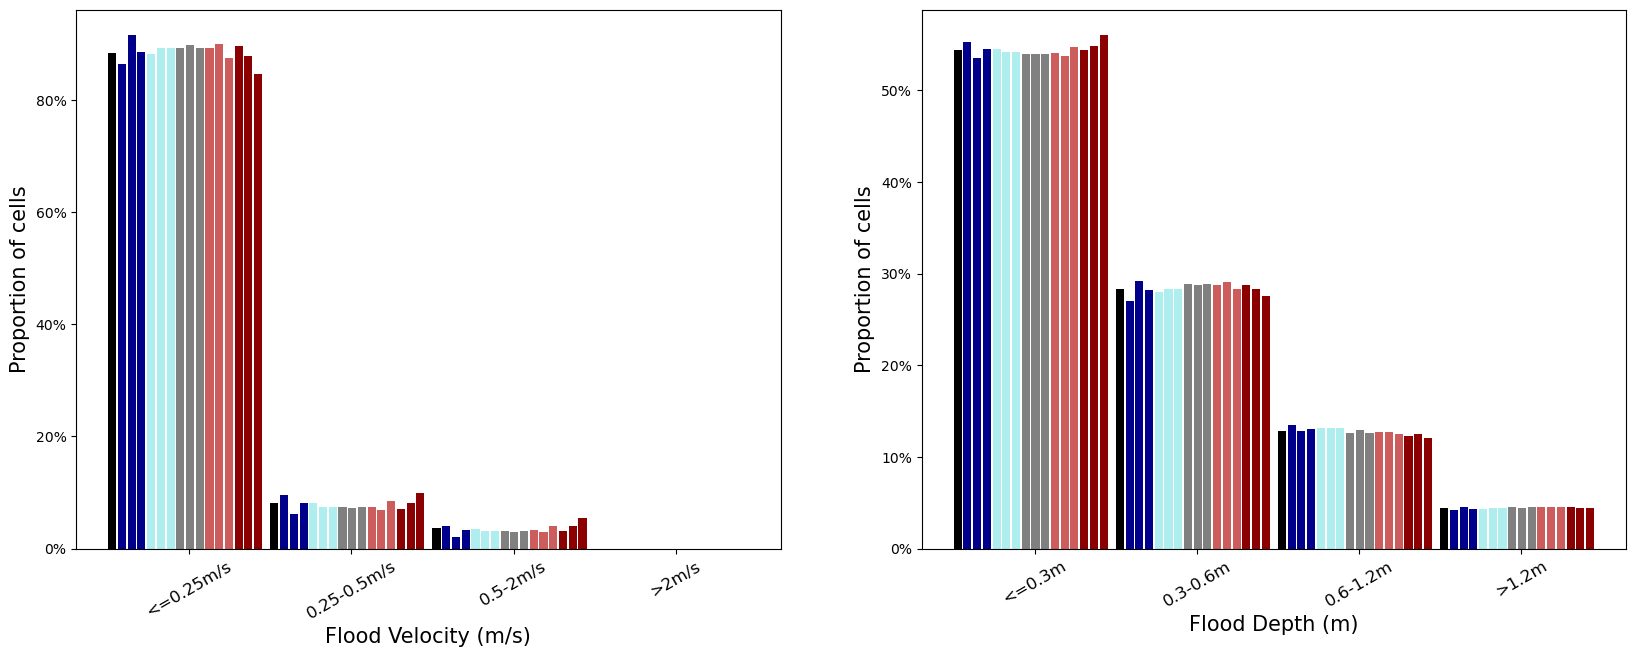

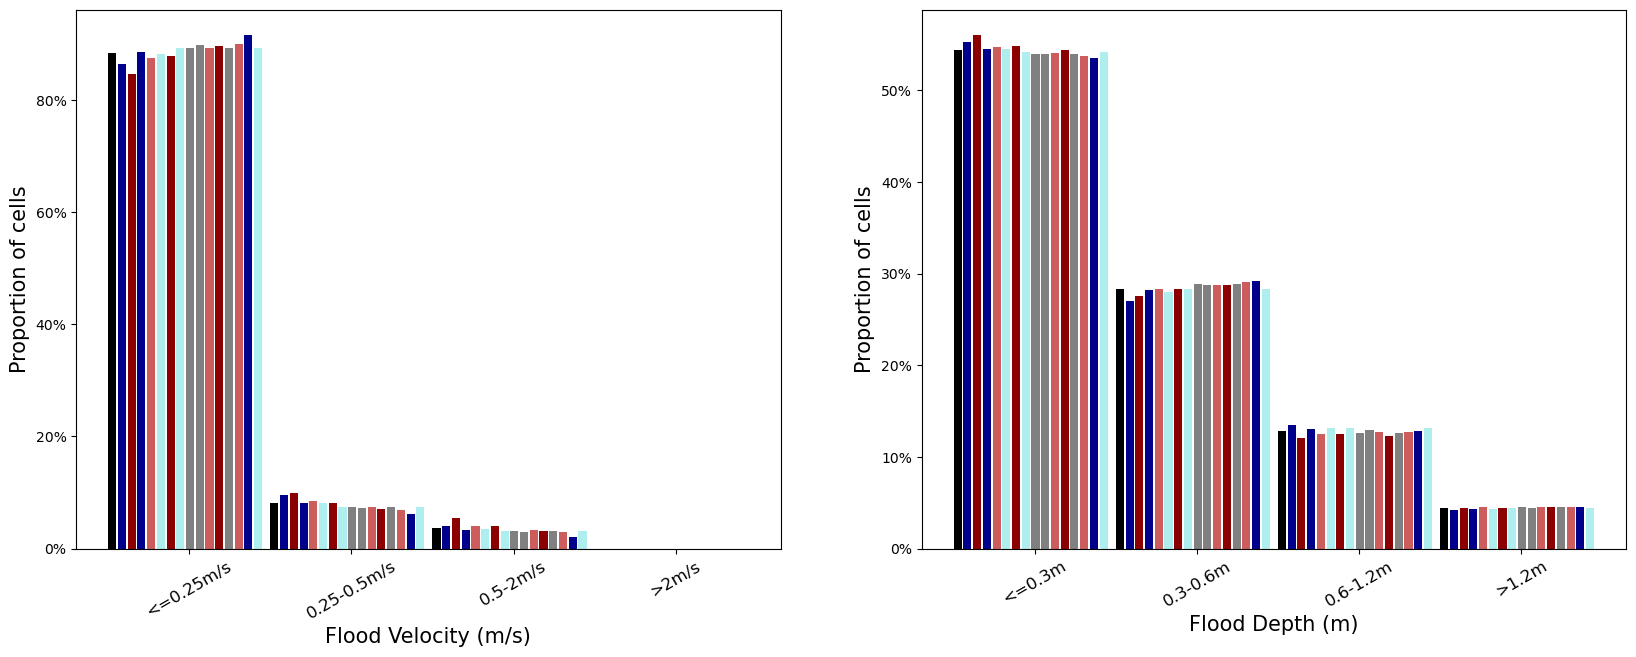

In [99]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (20,7))
bar_plot_props(axs[0],velocity_props, 'Velocity (m/s)',short_ids_by_loading, colours_df )
bar_plot_props(axs[1], depth_props, 'Depth (m)', short_ids_by_loading, colours_df)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (20,7))  
bar_plot_props(axs[0],velocity_props, 'Velocity (m/s)',short_ids_by_intensity,colours_df)
bar_plot_props(axs[1], depth_props, 'Depth (m)', short_ids_by_intensity, colours_df)

## Spatial extent of flooding, by depth category (for d >0.1m) for each rainfall distribution

## Spatial extent of flooding, by velocity category (for d >0.1m) for each rainfall distribution

## Difference in flood depth between a single peak and each of the multi-peaked methods
A positive difference implies that the flooding is deeper in the single peak method, whilst a negative difference implies the opposite.

### Difference in flood velocity between a single peak and each of the multi-peaked methods
A positive difference implies that the flooding is deeper/faster in the single peak method, whilst a negative difference implies the opposite